In [21]:
name = "SkySat-B"
rw = "C"

In [22]:
import datetime
import pprint
import types

from matplotlib import pyplot

import mach

In [23]:
MINUTE = datetime.timedelta(minutes=1)
WEEK = datetime.timedelta(days=7)
MONTH = datetime.timedelta(days=30)

SAT = {
    "SkySat-A": 1,
    "SkySat-B": 2
}

PDM = {
    "A": 1,
    "B": 2,
    "C": 3,
    "D": 4
}

STATE = {
    "PDM_OFF": 1,
    "DEVICE_OFF": 2,
    "DEVICE_OFF_WAIT": 3,
    "POWERING_UP": 4,
    "CONTROL_OFF": 5,
    "CONTROL_OFF_WAIT": 6,
    "CONTROL_ON": 7,
    "CONTROL_ON_WAIT": 8
}

ENG = [
    "ENG_EPB_A_SW_RW%s_CURR_AVG",
    "ENG_RW_%s_MOMENTUM",
    "ENG_RW_%s_PRESSURE",#nominally useless here
    "ENG_RW_%s_VOLT_LOGIC",#nominally useless here
    "ENG_RW_%s_VOLT_SUPPLY",
    "ENG_RW_PDM_%s_33V_TEMP",#nominally useless here
    "ENG_RW_PDM_%s_BUS_VOLT",
    "ENG_RW_PDM_%s_BUS_TEMP",#nominally useless here
]

NOW = datetime.datetime.utcnow()

RELEASE = {
    "1.17.4": datetime.datetime(2015, 6, 4),
    "1.17.5": datetime.datetime(2015, 6, 18)
}

In [24]:
evrs = [event \
        for event in mach.evr.read(SAT[name],
                                   t_sc=(NOW - 2 * WEEK,NOW),
                                   event_id=[50331744,])]

pprint.pprint([(event.t_sc,event.t_gs,event.contact_id) for event in evrs])

evrs = [event \
        for event in mach.evr.read(SAT[name],
                                   t_sc=(RELEASE["1.17.4"] - 6 * MONTH,
                                         RELEASE["1.17.5"]),
                                   event_id=[50331744,])]
#                                             268435492]) \
#        if isinstance(event.param[0],types.FloatType) or \
#           (event.param[0] == ord(rw) and event.param[2] == STATE["DEVICE_OFF"])]
        
#pprint.pprint([(event.t_sc, event.message) for event in evrs])
        
print "Pre-1.17.4 - %.4f nacf/day" % \
      (len([event for event in evrs \
            if RELEASE["1.17.4"] - 6 * MONTH < event.t_gs < RELEASE["1.17.4"]]) / \
      ((6 * MONTH).total_seconds() / 86400.))
print "Post-1.17.4 - %.4f nacf/day" % \
       (len([event for event in evrs \
             if RELEASE["1.17.4"] < event.t_gs < RELEASE["1.17.5"]]) / \
        ((RELEASE["1.17.5"] - RELEASE["1.17.4"]).total_seconds() / 86400.))

[(datetime.datetime(2015, 7, 7, 0, 21, 50, 3819),
  datetime.datetime(2015, 7, 7, 2, 16, 24, 823000),
  'SkySat-B-rev5375-Fairbanks-1'),
 (datetime.datetime(2015, 7, 7, 2, 41, 34, 3990),
  datetime.datetime(2015, 7, 7, 3, 50, 16, 787000),
  'SkySat-B-rev5376-Fairbanks-1'),
 (datetime.datetime(2015, 7, 7, 4, 18, 53, 3783),
  datetime.datetime(2015, 7, 7, 5, 24, 13, 196000),
  'SkySat-B-rev5377-Fairbanks-1'),
 (datetime.datetime(2015, 7, 9, 1, 4, 22, 316631),
  datetime.datetime(2015, 7, 9, 1, 22, 25, 29000),
  'SkySat-B-rev5404-Fairbanks-1')]
Pre-1.17.4 - 0.0389 nacf/day
Post-1.17.4 - 1.7857 nacf/day


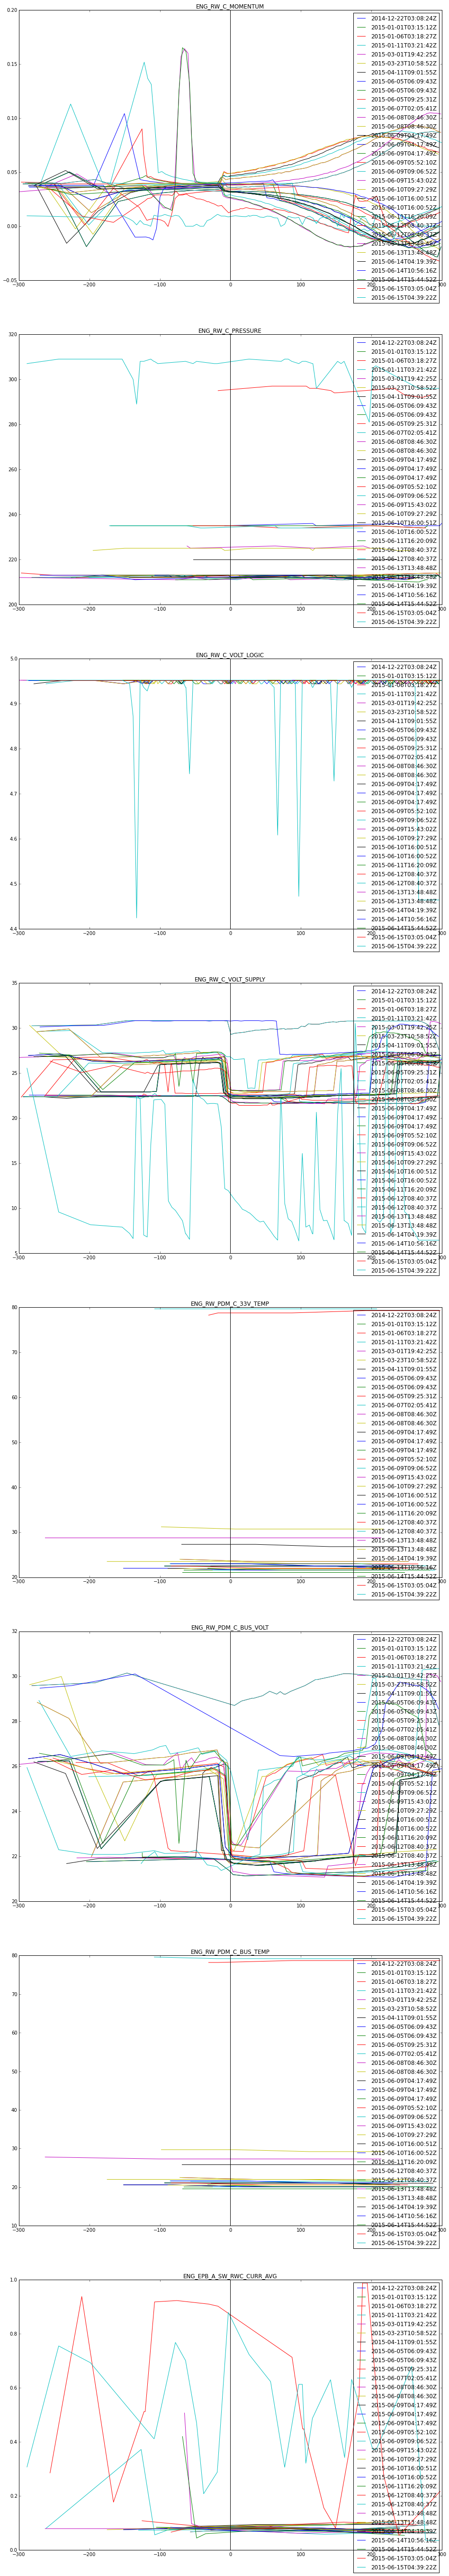

In [25]:
pyplot.rcParams['figure.figsize'] = [16, 12 * len(ENG)]

for event in evrs:
    engs = mach.eng.read(SAT[name],map(lambda x: x % rw, ENG),
                        t_sc=(event.t_gs - 5 * MINUTE,
                              event.t_gs + 5 * MINUTE))
    
    for i in range(len(ENG)):
        pyplot.subplot(len(ENG),1,i)
        pyplot.plot([(engs[ENG[i] % rw].t[j] - event.t_gs).total_seconds() \
                     for j in range(len(engs[ENG[i] % rw].t))],
                    engs[ENG[i] % rw].y,
                   label=event.t_gs.strftime("%Y-%m-%dT%H:%M:%SZ"))
        
for i in range(len(ENG)):
    pyplot.subplot(len(ENG),1,i)
    pyplot.title(ENG[i] % rw)
    pyplot.axvline(0,color="k")
    pyplot.legend()